In [18]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Prk Raju\Downloads\outputfinal (1) (1).xlsx")
print(df)
df.dropna(inplace = True)
df.drop_duplicates(inplace=True)
l1=[]
for index,row in df.iterrows():
  if (row['target_text'] >= 8) and (row['target_text'] <= 10):
    l1.append(1)
  else:
    l1.append(0)
df['class']=l1

                                            input_text  target_text
0    #include <stdio.h>\n\nint main()\n{\n    int n...            9
1    #include<stdio.h>\n#include<string.h>\nint mai...            9
2    #include<stdio.h>\n#include<string.h>\nmain()\...            9
3    #include<stdio.h>\n#include<string.h>\nint mai...            9
4    #include<stdio.h>\n#include<string.h>\nint mai...            9
..                                                 ...          ...
759  #include<stdio.h>\n#include<stdlib.h>\n#includ...            8
760  #include<stdio.h>\n#include<stdlib.h>\n#includ...            9
761  #include <stdio.h> \n#include <stdlib.h>\nstru...            9
762  #include <stdio.h>\n#include <stdlib.h>\n\nstr...           10
763  #include<stdio.h>\n#include<stdlib.h>\nstruct ...            8

[764 rows x 2 columns]


In [19]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [20]:
import torch
from transformers import RobertaTokenizer, RobertaConfig, RobertaModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
model = RobertaModel.from_pretrained("microsoft/codebert-base",max_position_embeddings=2500,ignore_mismatched_sizes=True)

Some weights of RobertaModel were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized because the shapes did not match:
- embeddings.position_embeddings.weight: found shape torch.Size([514, 768]) in the checkpoint and torch.Size([2500, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
l=[]
for index,row in df.iterrows():
  print(index)
  c_code=row["input_text"]
  tokens = tokenizer.encode(c_code, add_special_tokens=True)
  input_ids = torch.tensor(tokens)
  with torch.no_grad():
    output = model(input_ids[None,:])
  vector = output[0][0][-1].numpy()
  l.append(vector)

Token indices sequence length is longer than the specified maximum sequence length for this model (612 > 512). Running this sequence through the model will result in indexing errors


0
1
2
3
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
26
27
29
30
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
97
99
100
101
102
103
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
209
211
212
213
214
215
216
217
218
219
220
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
240
241
242
243
244
247
248
249
250
251
252
254
255
256
257
258
260
262
263
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
288
289
290
291
292
293
294
295
29

In [32]:
df['Vector'] =l

In [33]:
df['target_text'].value_counts()

10    181
9     139
8     105
7      84
6      73
5      58
4      42
3      19
2      12
1       2
Name: target_text, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
y=df['class']
X=df['target_text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv1D,MaxPooling1D,Dropout,BatchNormalization
import tensorflow as tf
from keras.regularizers import l2
import numpy as np
noisy_x_train = X_train + np.random.normal(loc=0, scale=0.9, size=X_train.shape)
X_train = tf.convert_to_tensor(list(noisy_x_train))
y_train = tf.convert_to_tensor(y_train)
X_valid = tf.convert_to_tensor(list(X_valid))
y_valid = tf.convert_to_tensor(y_valid)
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=1, kernel_regularizer=l2(0.01),activation='tanh',input_shape=(768, 1)))
model1.add(MaxPooling1D(pool_size=48))
model1.add(Conv1D(filters=64, kernel_size=1, kernel_regularizer=l2(0.01),activation='tanh'))
model1.add(MaxPooling1D(pool_size=12))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='MeanSquaredError',optimizer='adam', metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=200, batch_size=30,validation_data=(X_valid, y_valid))

Epoch 1/200


ValueError: in user code:

    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Anaconda\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_8' (type Sequential).
    
    Input 0 of layer "conv1d_10" is incompatible with the layer: expected min_ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_8' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


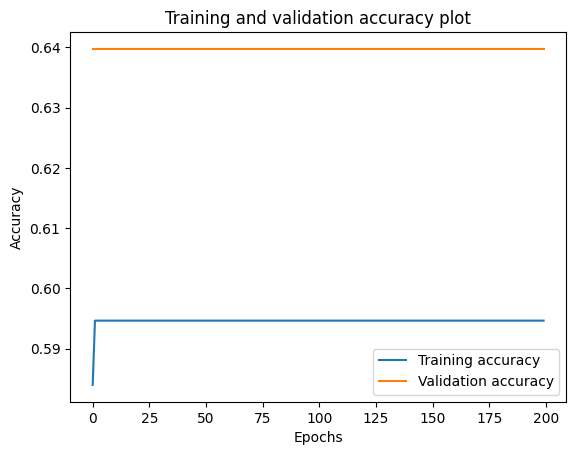

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

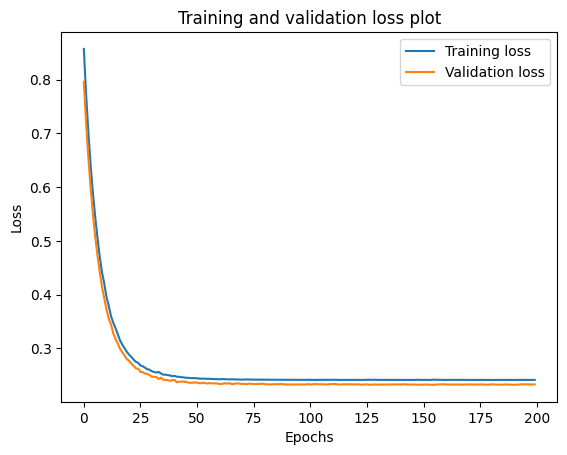

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
X_test = tf.convert_to_tensor(list(X_test))
y_test = tf.convert_to_tensor(y_test)
history = model1.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.5531


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_pred = model1.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_binary, average='binary')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

6/6 [==============================] - 0s 2ms/step
Precision: 0.55
Recall: 1.00
F1-score: 0.71


In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.regularizers import l2

model1 = Sequential()
model1.add(LSTM(units=64, input_shape=(768, 1), return_sequences=True))
model1.add(LSTM(units=64 ,kernel_regularizer=l2(0.01)))
model1.add(Dense(units=10, activation='sigmoid'))

model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=100, batch_size=30, validation_data=(X_valid, y_valid))


Epoch 1/100


ValueError: in user code:

    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Anaconda\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "lstm_3" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


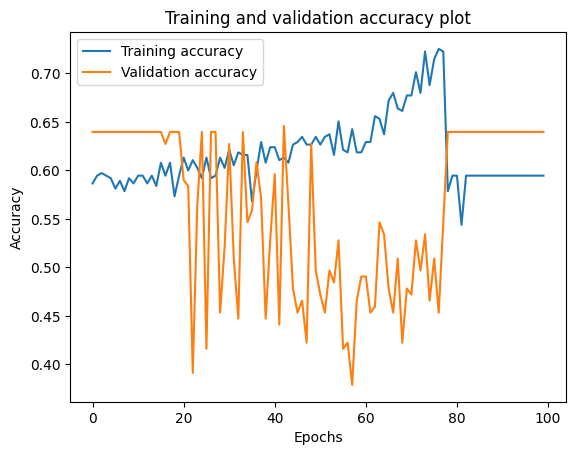

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()

# Block 1
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(768, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides=2))

# Block 2
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides=2))

# Block 3
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides=2))

# Block 4
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides=2))

# Block 5
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, strides=2))

# Classifier
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 768, 64)           256       
                                                                 
 conv1d_21 (Conv1D)          (None, 768, 64)           12352     
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 384, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 384, 128)          24704     
                                                                 
 conv1d_23 (Conv1D)          (None, 384, 128)          49280     
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 192, 128)         0         
 g1D)                                                

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=30, validation_data=(X_valid, y_valid))


Epoch 1/100
13/13 [==============================] - 13s 133ms/step - loss: 0.2586 - accuracy: 0.5627 - val_loss: 0.2382 - val_accuracy: 0.6398
Epoch 2/100
13/13 [==============================] - 1s 54ms/step - loss: 0.2439 - accuracy: 0.5947 - val_loss: 0.2333 - val_accuracy: 0.6398
Epoch 3/100
13/13 [==============================] - 1s 60ms/step - loss: 0.2416 - accuracy: 0.5947 - val_loss: 0.2368 - val_accuracy: 0.6398
Epoch 4/100
13/13 [==============================] - 1s 53ms/step - loss: 0.2425 - accuracy: 0.5947 - val_loss: 0.2366 - val_accuracy: 0.6398
Epoch 5/100
13/13 [==============================] - 1s 55ms/step - loss: 0.2416 - accuracy: 0.5947 - val_loss: 0.2332 - val_accuracy: 0.6398
Epoch 6/100
13/13 [==============================] - 1s 60ms/step - loss: 0.2434 - accuracy: 0.5947 - val_loss: 0.2330 - val_accuracy: 0.6398
Epoch 7/100
13/13 [==============================] - 1s 60ms/step - loss: 0.2415 - accuracy: 0.5947 - val_loss: 0.2329 - val_accuracy: 0.6398
Epoc

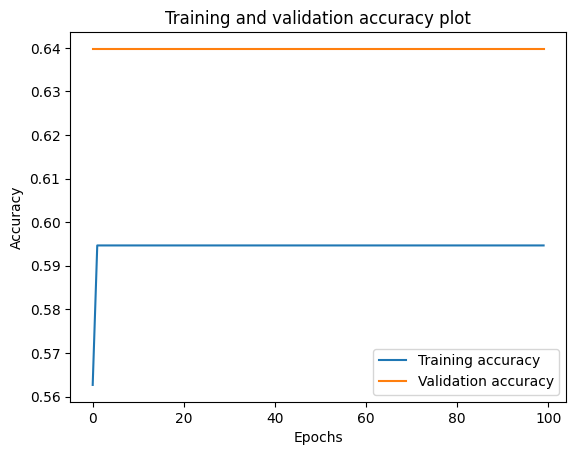

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

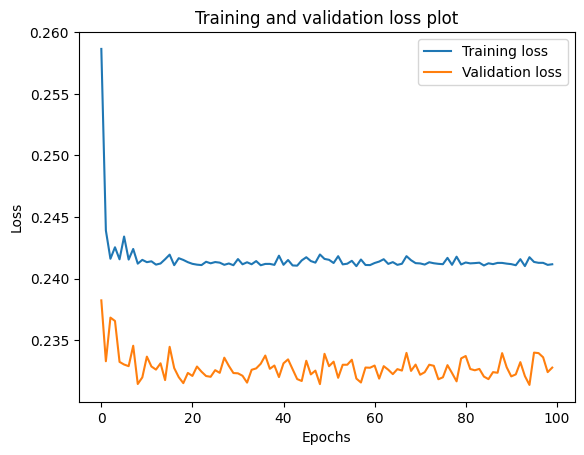

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()

model.add(Conv1D(filters=6, kernel_size=5, activation='relu', input_shape=(768, 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())


model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=1, activation='softmax'))

model.summary()


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_37 (Conv1D)          (None, 764, 6)            36        
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 382, 6)           0         
 g1D)                                                            
                                                                 
 conv1d_38 (Conv1D)          (None, 378, 16)           496       
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 189, 16)          0         
 g1D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 3024)              0         
                                                                 
 dense_23 (Dense)            (None, 120)             

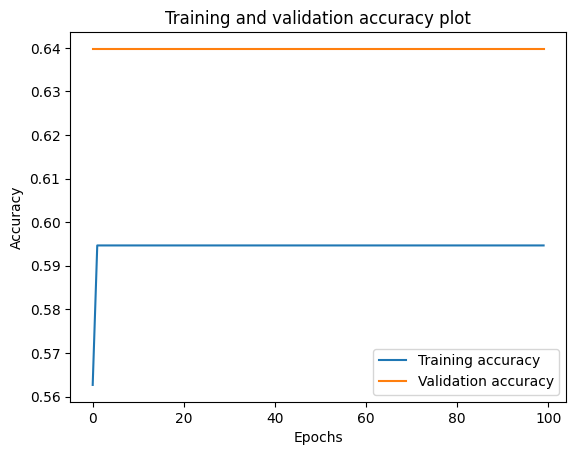

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

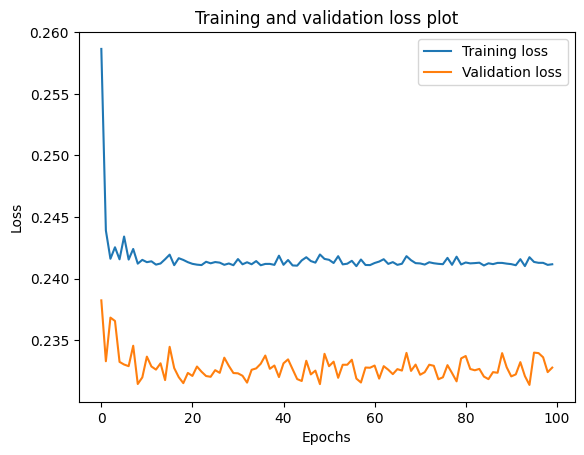

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
pip install streamlit


     ---------------------------------------- 8.9/8.9 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 164.8/164.8 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 21.5/21.5 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 184.3/184.3 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 238.7/238.7 kB 7.4 MB/s eta 0:00:00
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validat

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [15]:
def processString(x):
    print(x.replace('process','whatever'))

sampleCode = ""
while True:
    if sampleCode == "":
        sampleCode = ""
        print("Enter string:")
    x = input()
    if x == "" and sampleCode != "":
        processString(sampleCode)
        break
    else:
        sampleCode += x

Enter string:
#include<stdio.h>Hi...


In [17]:
tokens1 = tokenizer.encode(sampleCode, add_special_tokens=True)
input_ids = torch.tensor(tokens1)
with torch.no_grad():
    output = model(input_ids[None,:])
vector = output[0][0][-1].numpy()

ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).

Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (12,)

Call arguments received by layer 'sequential_1' (type Sequential):
  • inputs=tensor([    0, 10431, 47209, 41552, 47717,  1020,     4,   298, 15698, 30086,
          734,     2])
  • training=None
  • mask=None